In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Paso 2: Cargar el conjunto de datos MNIST

In [2]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Paso 3: Preprocesar los datos

In [ ]:
# Preprocesar las imágenes: normalizar y cambiar la forma
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


# Paso 4: Definir el modelo MLP

In [25]:

# Crear el modelo CNN
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import BatchNormalization

model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),  # Nueva capa
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Nueva capa
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),  # Nueva capa
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),  # Nueva capa
    layers.Dropout(0.4),  # Aumentar un poco el dropout
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])


# Paso 5: Compilar el modelo

In [26]:
# Compilar el modelo
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [27]:
# Generador de datos con aumentación
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [28]:
# Callback de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [29]:
# Entrenar el modelo usando el generador de datos con Early Stopping
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    validation_data=(test_images, test_labels),
    epochs=15,
    callbacks=[early_stopping]
)

Epoch 1/15
938/938 [==============================] - 105s 109ms/step - loss: 3.5460 - accuracy: 0.2543 - val_loss: 2.3201 - val_accuracy: 0.6014
Epoch 2/15
938/938 [==============================] - 110s 117ms/step - loss: 2.6430 - accuracy: 0.4424 - val_loss: 1.7715 - val_accuracy: 0.7226
Epoch 3/15
938/938 [==============================] - 108s 116ms/step - loss: 2.1300 - accuracy: 0.5572 - val_loss: 1.4073 - val_accuracy: 0.7868
Epoch 4/15
938/938 [==============================] - 110s 117ms/step - loss: 1.7572 - accuracy: 0.6358 - val_loss: 1.1869 - val_accuracy: 0.7965
Epoch 5/15
938/938 [==============================] - 109s 116ms/step - loss: 1.4780 - accuracy: 0.6891 - val_loss: 0.9694 - val_accuracy: 0.8337
Epoch 6/15
938/938 [==============================] - 109s 116ms/step - loss: 1.2616 - accuracy: 0.7305 - val_loss: 0.7906 - val_accuracy: 0.8667
Epoch 7/15
938/938 [==============================] - 109s 116ms/step - loss: 1.1016 - accuracy: 0.7557 - val_loss: 0.6548 -

# Paso 6: Entrenar el modelo

In [30]:
# Entrenar el modelo
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.1)


Epoch 1/15
844/844 [==============================] - 91s 108ms/step - loss: 0.2489 - accuracy: 0.9637 - val_loss: 0.1553 - val_accuracy: 0.9825
Epoch 2/15
844/844 [==============================] - 94s 112ms/step - loss: 0.1917 - accuracy: 0.9755 - val_loss: 0.1354 - val_accuracy: 0.9857
Epoch 3/15
844/844 [==============================] - 98s 116ms/step - loss: 0.1645 - accuracy: 0.9800 - val_loss: 0.1154 - val_accuracy: 0.9897
Epoch 4/15
844/844 [==============================] - 94s 111ms/step - loss: 0.1440 - accuracy: 0.9822 - val_loss: 0.1053 - val_accuracy: 0.9890
Epoch 5/15
844/844 [==============================] - 94s 112ms/step - loss: 0.1251 - accuracy: 0.9851 - val_loss: 0.0990 - val_accuracy: 0.9877
Epoch 6/15
844/844 [==============================] - 94s 112ms/step - loss: 0.1105 - accuracy: 0.9865 - val_loss: 0.0887 - val_accuracy: 0.9883
Epoch 7/15
844/844 [==============================] - 94s 112ms/step - loss: 0.1002 - accuracy: 0.9881 - val_loss: 0.0804 - val_ac

# Paso 7: Evaluar el modelo

In [31]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 4s 14ms/step - loss: 0.0661 - accuracy: 0.9882
Test accuracy: 0.9882000088691711


# Paso 8: Probar el modelo con una imagen del conjunto de prueba

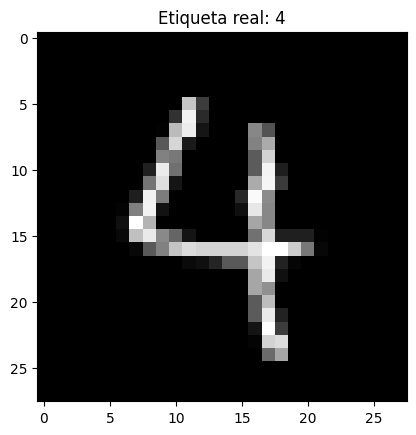

1/1 [==============================] - 0s 420ms/step
Predicción del modelo: 4


In [32]:
test_image = test_images[24]
test_label = test_labels[24]  # Esta es la etiqueta correcta, para referencia

# Mostrar la imagen
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Etiqueta real: {test_label}")
plt.show()

# Preprocesar la imagen de prueba
test_image = test_image.reshape((1, 28, 28, 1))  # Cambiar forma a (1, 28, 28, 1)

# Realizar la predicción
predictions = model.predict(test_image)

# Obtener la clase predicha (el dígito) con el índice de mayor probabilidad
predicted_label = np.argmax(predictions)
print(f'Predicción del modelo: {predicted_label}')


# Paso 9: Probar el modelo con una imagen personalizada

1/1 [==============================] - 0s 22ms/step
Predicción para la imagen personalizada: 4


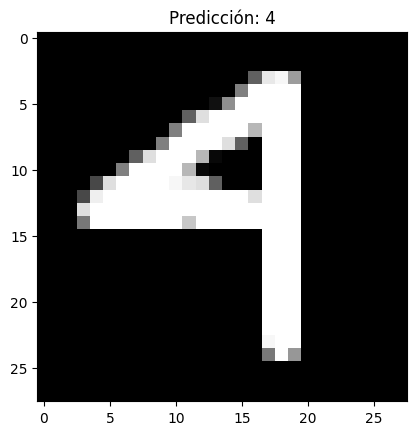

In [33]:
def predecir_imagen_personalizada(ruta_imagen):
    # Cargar la imagen, convertirla a escala de grises y redimensionarla a 28x28
    img = Image.open(ruta_imagen).convert('L')
    img = img.resize((28, 28))
    
    # Convertir la imagen a un array de numpy, normalizar los valores y ajustar la forma a (1, 28, 28, 1)
    img_array = np.array(img).astype('float32') / 255  # Normalizar
    img_array = img_array.reshape(1, 28, 28, 1)  # Cambiar forma a (1, 28, 28, 1)
    
    # Hacer la predicción con el modelo
    prediccion = model.predict(img_array)
    
    # Obtener el dígito predicho
    digit_predicho = np.argmax(prediccion)
    
    # Mostrar la imagen y la predicción
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.show()

# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)
predecir_imagen_personalizada('D:/Inteligencia artifical/prueba 4.png')

Procesando imágenes en la carpeta: D:/Inteligencia artifical/test2/
Archivo encontrado: 0.png
Procesando imagen: D:/Inteligencia artifical/test2/0.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/0.png
1/1 [==============================] - 0s 21ms/step
Predicción para 0.png: 8


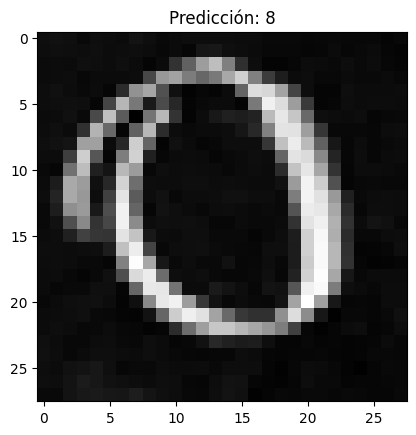

Archivo encontrado: 1.png
Procesando imagen: D:/Inteligencia artifical/test2/1.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/1.png
1/1 [==============================] - 0s 26ms/step
Predicción para 1.png: 6


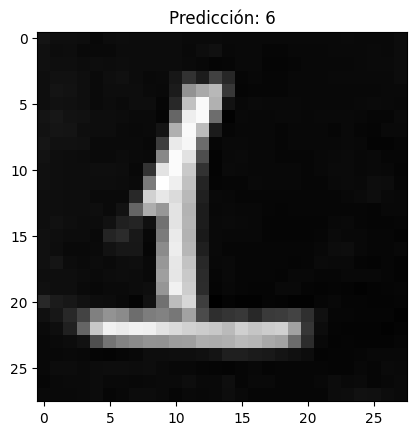

Archivo encontrado: 2.png
Procesando imagen: D:/Inteligencia artifical/test2/2.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/2.png
1/1 [==============================] - 0s 22ms/step
Predicción para 2.png: 8


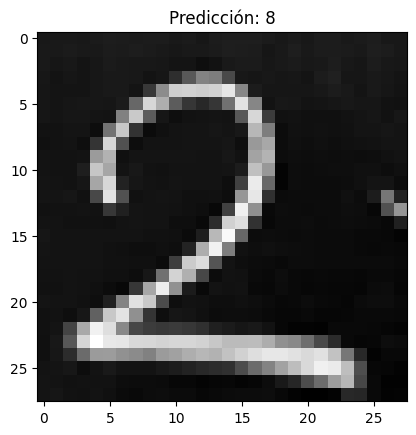

Archivo encontrado: 3.png
Procesando imagen: D:/Inteligencia artifical/test2/3.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/3.png
1/1 [==============================] - 0s 23ms/step
Predicción para 3.png: 8


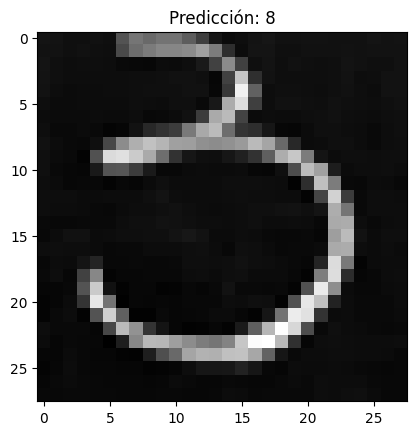

Archivo encontrado: 4.png
Procesando imagen: D:/Inteligencia artifical/test2/4.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/4.png
1/1 [==============================] - 0s 26ms/step
Predicción para 4.png: 8


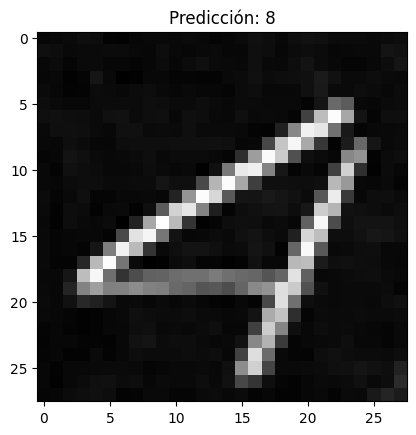

Archivo encontrado: 5.png
Procesando imagen: D:/Inteligencia artifical/test2/5.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/5.png
1/1 [==============================] - 0s 27ms/step
Predicción para 5.png: 8


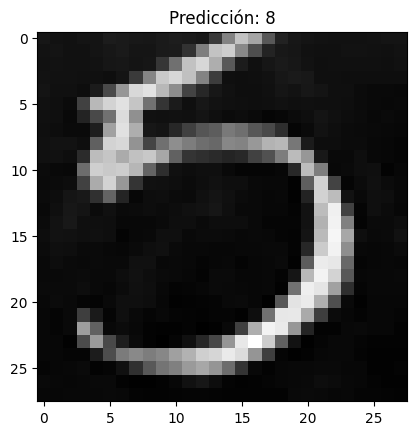

Archivo encontrado: 6.png
Procesando imagen: D:/Inteligencia artifical/test2/6.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/6.png
1/1 [==============================] - 0s 29ms/step
Predicción para 6.png: 8


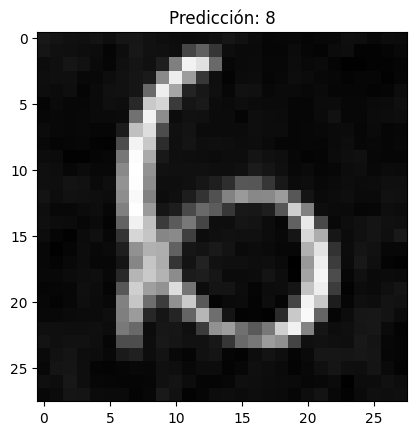

Archivo encontrado: 7.png
Procesando imagen: D:/Inteligencia artifical/test2/7.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/7.png
1/1 [==============================] - 0s 24ms/step
Predicción para 7.png: 8


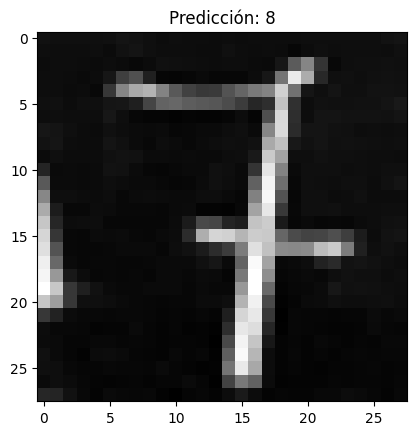

Archivo encontrado: 8.png
Procesando imagen: D:/Inteligencia artifical/test2/8.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/8.png
1/1 [==============================] - 0s 25ms/step
Predicción para 8.png: 8


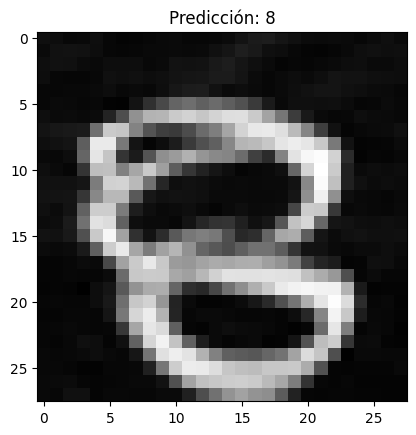

Archivo encontrado: 9.png
Procesando imagen: D:/Inteligencia artifical/test2/9.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/9.png
1/1 [==============================] - 0s 24ms/step
Predicción para 9.png: 8


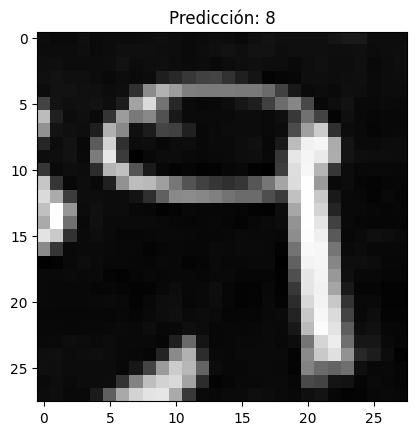

Archivo encontrado: ocho.png
Procesando imagen: D:/Inteligencia artifical/test2/ocho.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/ocho.png
1/1 [==============================] - 0s 27ms/step
Predicción para ocho.png: 8


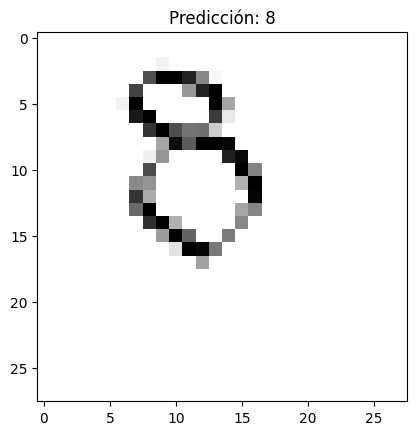

In [34]:
import os
def predecir_imagen_personalizada(ruta_imagen):
    try:
        print(f"Procesando imagen: {ruta_imagen}")  # Debug
        
        # Cargar la imagen, convertir a escala de grises y redimensionar a 28x28
        img = Image.open(ruta_imagen).convert('L')
        img = img.resize((28, 28))
        
        # Convertir la imagen a un array de numpy, normalizar y ajustar la forma a (1, 28, 28, 1)
        img_array = np.array(img).astype('float32') / 255  # Normalizar
        img_array = img_array.reshape(1, 28, 28, 1)  # Cambiar forma a (1, 28, 28, 1)

        print(f"Imagen procesada correctamente: {ruta_imagen}")  # Debug
        
        # Hacer la predicción con el modelo
        prediccion = model.predict(img_array)
        
        # Obtener el dígito predicho
        digit_predicho = np.argmax(prediccion)
        
        # Mostrar la imagen y el resultado de la predicción
        print(f'Predicción para {os.path.basename(ruta_imagen)}: {digit_predicho}')
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicción: {digit_predicho}')
        plt.show()
    
    except Exception as e:
        print(f"Error procesando {ruta_imagen}: {e}")

# Función para iterar sobre todas las imágenes en una carpeta
def predecir_imagenes_en_carpeta(ruta_carpeta):
    print(f"Procesando imágenes en la carpeta: {ruta_carpeta}")
    
    archivos_encontrados = os.listdir(ruta_carpeta)  # Obtener la lista de archivos
    
    if len(archivos_encontrados) == 0:
        print(f"No se encontraron archivos en la carpeta: {ruta_carpeta}")
    
    for archivo in archivos_encontrados:
        print(f"Archivo encontrado: {archivo}")  # Imprimir cada archivo encontrado
        
        if archivo.endswith(('.png', '.jpg', '.jpeg')):  # Verificar si es una imagen
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            predecir_imagen_personalizada(ruta_imagen)
        else:
            print(f"{archivo} no es una imagen válida.")  # Archivos no válidos

# Ruta de la carpeta de imágenes de prueba
ruta_carpeta = 'D:/Inteligencia artifical/test2/'

# Ejecutar la predicción para todas las imágenes en la carpeta
predecir_imagenes_en_carpeta(ruta_carpeta)